In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from scipy.stats import uniform

In [3]:
NUM_LABEL_COLS = 13

df = pd.read_pickle('./all_data.pkl')

In [4]:
df_filtered = df
df_filtered.shape

(9080, 10790)

In [7]:
# exclude records we want to exclude
df_filtered = df_filtered[df_filtered['trmp'] == '0']
df_filtered = df_filtered[df_filtered['trmb'] == '0']
df_filtered = df_filtered[df_filtered['otrb'] == '0']
df_filtered = df_filtered[df_filtered['ext'] == '0']
df_filtered = df_filtered[df_filtered['excl'] == '0']
print('df filt shape: ', df_filtered.shape)

# we are keeping sop, alt, tenr, tora, bari, clrt, other = 7
                                                                        # off by one?
num_x_cols = df_filtered.shape[1] - NUM_LABEL_COLS                      # - 1 
print('num_x_cols:', num_x_cols)
# ^ last bit to adjust for zero indexing
data = df_filtered.iloc[:, 1:num_x_cols].to_numpy() 
# ^ These are the features
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

# Create target column
combined = df_filtered[['sop']].to_numpy() + \
    df_filtered[['alto']].to_numpy() + \
    df_filtered[['tenr']].to_numpy() + \
    df_filtered[['tora']].to_numpy() + \
    df_filtered[['bari']].to_numpy()
    
combined = combined.astype('int')
combined[combined > 0] = 1
df_filtered['sax'] = combined

target = df_filtered[['sax']].to_numpy().ravel()  # << This is the label
# ^ le target

print(data.shape)
print(target.shape)

df filt shape:  (7657, 10791)
num_x_cols: 10778
(7657, 10777)
(7657,)


In [8]:
xs = [n for n in range(4, 60, 1)]
ys = []
for x in xs:
    pca = PCA(n_components=x)
    pca.fit(data)
    d = pca.transform(data)
    x_train, x_test, y_train, y_test = \
         train_test_split(d, target, test_size=0.20, random_state=0)
    print('PCA val: ', x)
    clf = SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    ys.append(clf.score(x_test, y_test))

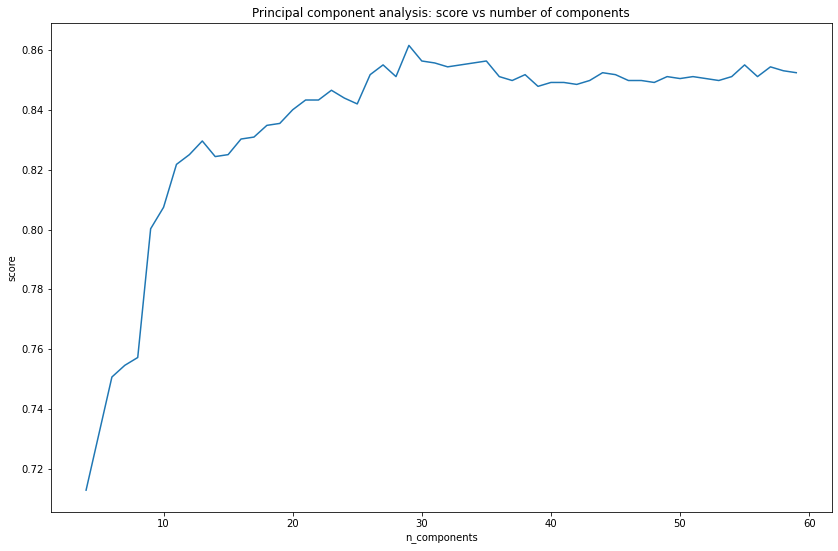

In [9]:
fig = plt.figure(figsize=(14, 9))    
plt.plot(xs, ys)
plt.xlabel('n_components')
plt.ylabel('score')
plt.title("Principal component analysis: score vs number of components")
pass

In [10]:
pca = PCA()
pca.fit(data)

PCA()

Text(0, 0.5, 'Cumulative explained variance')

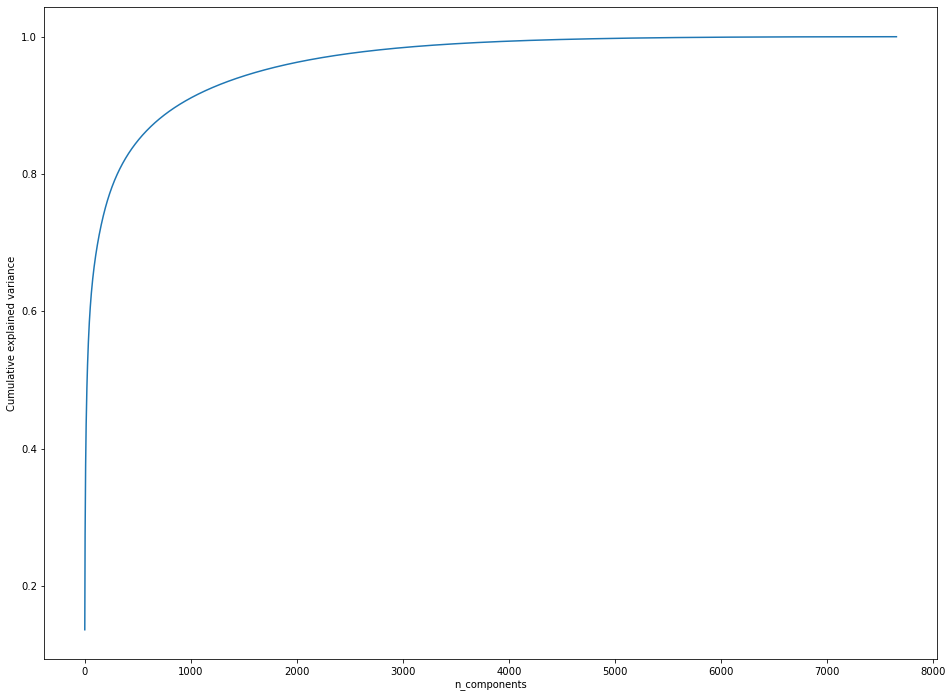

In [11]:
fig = plt.figure(figsize=(16, 12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')

In [21]:
xy = np.array([xs, ys])
# print(xy.T)

In [23]:
max_pca = xs[ys.index(max(ys))]
print('Best PCA value:', max_pca)

Best PCA value: 29


# 2D PCA visual

In [29]:
pca2 = PCA(n_components = 2)
pca_data = pca2.fit_transform(data)
print(pca_data.shape)

(7657, 2)


In [37]:
target_dict = {}
target_dict[0] = np.where(target == 0)
target_dict[1] = np.where(target == 1)

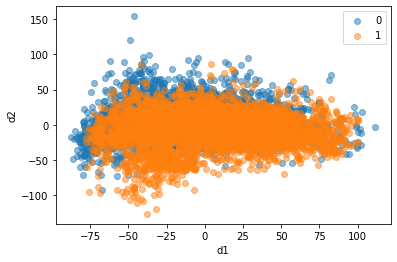

In [38]:
plt.scatter(pca_data[:,0][target_dict[0]], pca_data[:,1][target_dict[0]], alpha=0.5)
plt.scatter(pca_data[:,0][target_dict[1]], pca_data[:,1][target_dict[1]], alpha=0.5)
plt.xlabel('d1')
plt.ylabel('d2')
plt.legend(['0','1'])
plt.show()

# 3D PCA

In [39]:
pca2 = PCA(n_components = 3)
pca_data = pca2.fit_transform(data)
print(pca_data.shape)

(7657, 3)


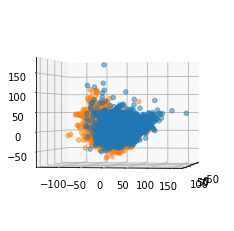

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data[:,0][target_dict[0]], \
            pca_data[:,1][target_dict[0]], \
            pca_data[:,2][target_dict[0]], alpha=0.5)
ax.scatter(pca_data[:,0][target_dict[1]], \
            pca_data[:,1][target_dict[1]], \
            pca_data[:,2][target_dict[1]], alpha=0.5)

ax.view_init(elev=0, azim=10)